In [15]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [59]:
df = pd.read_csv('virtual_assembly_rsvp_list_noNames_cleaned3.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805 entries, 0 to 804
Data columns (total 11 columns):
 #   Column                                                  Non-Null Count  Dtype 
---  ------                                                  --------------  ----- 
 0   How do you identify? (Race and Ethnicity)               801 non-null    object
 1   race_category                                           805 non-null    object
 2   Are you looking for a new role or opportunity?          803 non-null    object
 3   What are your top 3 needs as a womxn of color at work?  773 non-null    object
 4   Billing Zip                                             776 non-null    object
 5   Job Title                                               805 non-null    object
 6   Job_Title_Grouped                                       805 non-null    object
 7   Career_Level                                            787 non-null    object
 8   Industry                                          

,How do you identify? (Race and Ethnicity),race_category,Are you looking for a new role or opportunity?,What are your top 3 needs as a womxn of color at work?,Billing Zip,Job Title,Job_Title_Grouped,Career_Level,Industry,Company,Company_Original
0,African American,Black,"Interested, but not actively seeking a new role",To have my expertise acknowledge\nTo be includ...,98118,"Director, Volunteer Engagement","Director, Volunteer Engagement",Executive/Director,Community Building/ Outreach,United Way Of King County,United Way Of King County
1,Multiracial Se Asian *and* Pacific Islander Am...,Multiracial,"Interested, but not actively seeking a new role",* As a result of the leaky STEMM pipeline in p...,98402,Biologist,Biologist,Mid,Healthcare / Life Sciences,University Of Washington,University Of Washington
2,South Asian,Asian,No,NaN,98107,Health Economist,Health Economist,Mid,Healthcare / Life Sciences,Seattle Genetics,Seattle Genetics
3,South Asian,Asian,"Interested, but not actively seeking a new role",representation and community of other womxn of...,98103,Principal,Principal,Executive/Director,Education,Mercer,Mercer
4,African American,Black,"Interested, but not actively seeking a new role",Affinity with a trusted band of people; for th...,98052,"Director, Opportunity, Equity And Inclusion","Director, Opportunity, Equity And Inclusion",Executive/Director,Education,Lake Washington School District,Lake Washington School District


## Seeking Next Role
Raw data includes 6 entries as follows

In [3]:
df['Are you looking for a new role or opportunity?'].value_counts()

No                                                                                    354
Interested, but not actively seeking a new role                                       235
Yes, actively seeking a new role                                                      188
Yes, actively seeking a new role | Interested, but not actively seeking a new role     16
No | Interested, but not actively seeking a new role                                    9
seeking                                                                                 1
Name: Are you looking for a new role or opportunity?, dtype: int64

In [38]:
colors = ['#421639','#1b3c31','#a26629','#9a7565','#e5e5e5']
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

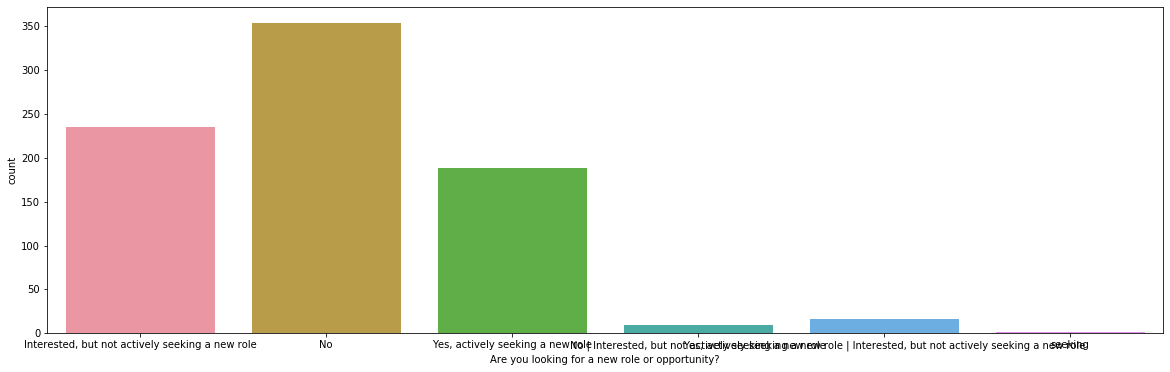

In [5]:
#sns.set_context('poster')
plt.figure(figsize=(20,6))
sns.countplot(x='Are you looking for a new role or opportunity?', data=df)

### Merge categories together to end up with only 3 categories: 
* No
* Yes, actively seeking a new role
* Interested, but not actively seeking 

Specifically, these categories were merged into the 'interested, but not actively seeking' group: 
* Yes, actively seeking a new role | Interested, but not actively seeking a new role     16 entries
* No | Interested, but not actively seeking a new role                                    9 entries

This was merged into yes:
* seeking 1 entry

In [7]:
replace_seeking = ({"Yes, actively seeking a new role | Interested, but not actively seeking a new role":
                   "Interested, but not actively seeking a new role",
                   "No | Interested, but not actively seeking a new role":
                    "Interested, but not actively seeking a new role",
                   "seeking":"Yes, actively seeking a new role"})

In [8]:
df['Are you looking for a new role or opportunity?'].replace(replace_seeking,inplace=True)
df['Are you looking for a new role or opportunity?'].value_counts()

No                                                 354
Interested, but not actively seeking a new role    260
Yes, actively seeking a new role                   189
Name: Are you looking for a new role or opportunity?, dtype: int64

In [9]:
rename_seeking = ({'Yes, actively seeking a new role':'Yes',
                  'Interested, but not actively seeking a new role':
                   'Interested'})
df['Are you looking for a new role or opportunity?'].replace(rename_seeking,inplace=True)
df['Are you looking for a new role or opportunity?'].value_counts()

No            354
Interested    260
Yes           189
Name: Are you looking for a new role or opportunity?, dtype: int64

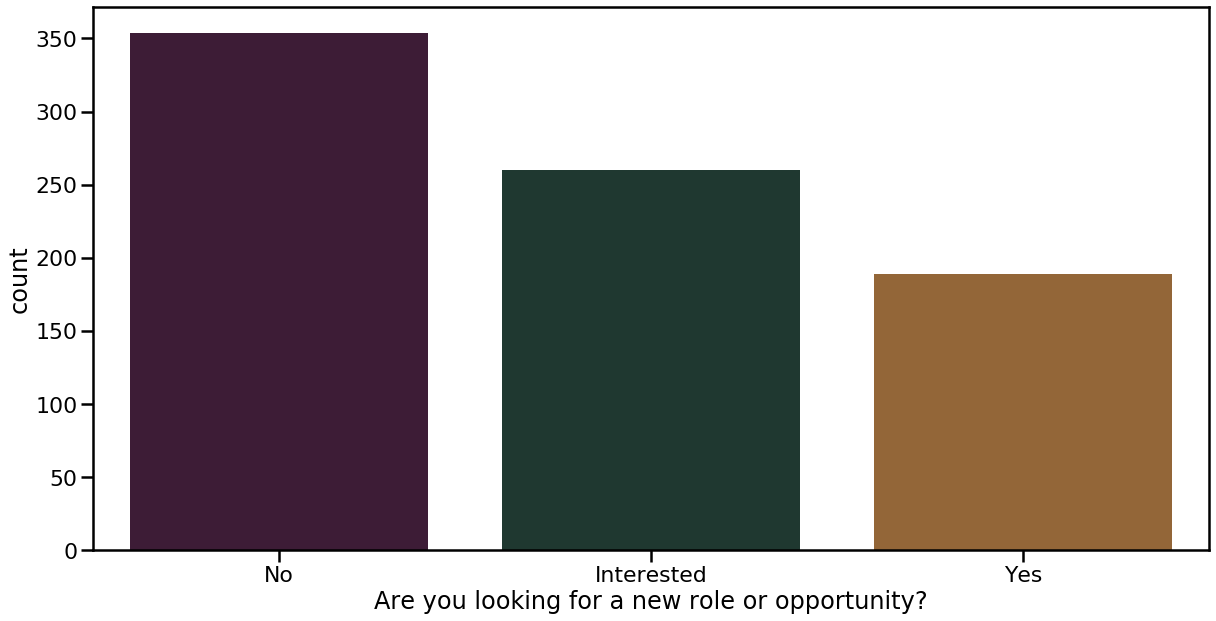

In [10]:
#sns.set_context('poster', font_scale=2)
plt.figure(figsize=(20,10))
sns.countplot(x='Are you looking for a new role or opportunity?', data=df,order=['No','Interested','Yes'])

### Save pickle

# Pie charts

In [44]:
df['Are you looking for a new role or opportunity?'].value_counts()

No            354
Interested    260
Yes           189
Name: Are you looking for a new role or opportunity?, dtype: int64

In [45]:
# Create a new dataframe with counts - use these in the pie chart
df_new_role = df['Are you looking for a new role or opportunity?'].value_counts().rename_axis('unique_values').reset_index(name='counts')
df_new_role

,unique_values,counts
0,No,354
1,Interested,260
2,Yes,189


### Save pickle

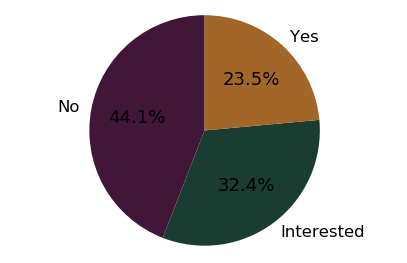

In [57]:
# Create a pie chart
plt.pie(
    # using data df
    df_new_role['counts'],
    # with the labels being categories
    labels=df_new_role['unique_values'],
    # with no shadows
    shadow=False,
    # with colors set above 
    colors=colors,
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )

# View the plot drop above
plt.axis('equal')

# View the plot
plt.tight_layout()
plt.show()

# Career Levels:

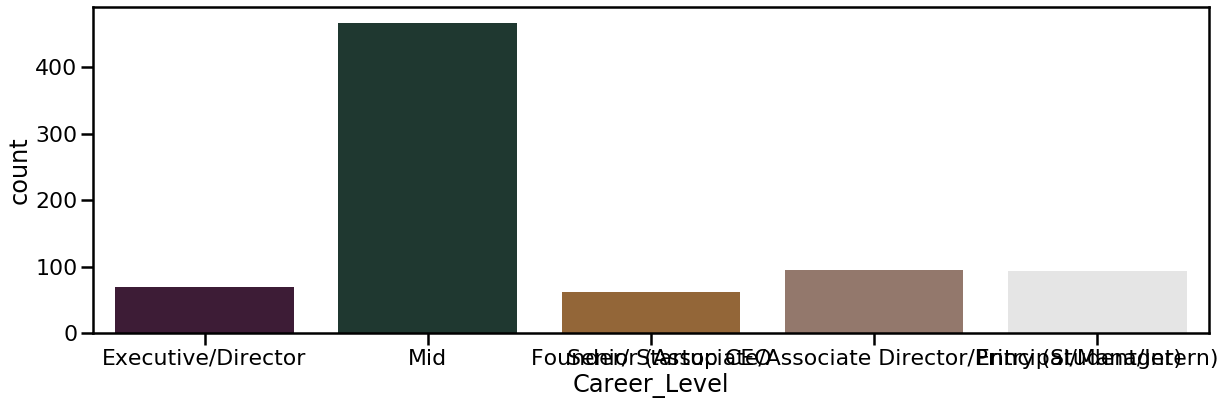

In [11]:
plt.figure(figsize=(20,6))
sns.countplot(x='Career_Level', data=df)

In [12]:
df_mergeFounders = df.copy()

In [13]:
df_mergeFounders['Career_Level'].unique()

array(['Executive/Director', 'Mid', 'Founder/ Startup CEO',
       'Senior (Associate/Associate Director/Principal/Manager)',
       'Entry (Student/Intern)', nan], dtype=object)

In [14]:
rename_career_level = ({'Executive/Director':'Executive',
                       'Mid':'Middle',
                       'Founder/ Startup CEO':'Executive',
                       'Senior (Associate/Associate Director/Principal/Manager)':'Senior',
                       'Entry (Student/Intern)':'Entry'})
df_mergeFounders['Career_Level'].replace(rename_career_level,inplace=True)
df_mergeFounders['Career_Level'].value_counts()

Middle       467
Executive    132
Senior        95
Entry         93
Name: Career_Level, dtype: int64

In [ ]:
sns.set_context('poster',font_scale=1.3)
plt.figure(figsize=(20,6))
order = ['Entry','Middle','Senior','Executive']
sns.countplot(x='Career_Level', data=df_mergeFounders, order=order)

### Save pickle

# Save figures

In [ ]:
plt.figure(figsize=(20,6))
sns.set_style('white',{'axes.grid': 'False'})
plt.rcParams.update({'text.color':'white',
                    'axes.labelcolor':'white', 
                    'xtick.color':'white',
                    'ytick.color':'white',
                    'axes.edgecolor':'white'})
plt.tight_layout()
plt.xlabel('Topic', labelpad=20)
plt.ylabel('Number of Attendees', labelpad=20)
sns.set_context('poster', font_scale=1)

sns.barplot(x='Topic', y='Number of Attendees',data=needs_df,color='#e5e5e5')
plt.savefig('top_needs_bar_gray', dpi=300,transparent=True,bbox_inches='tight')

# Industry

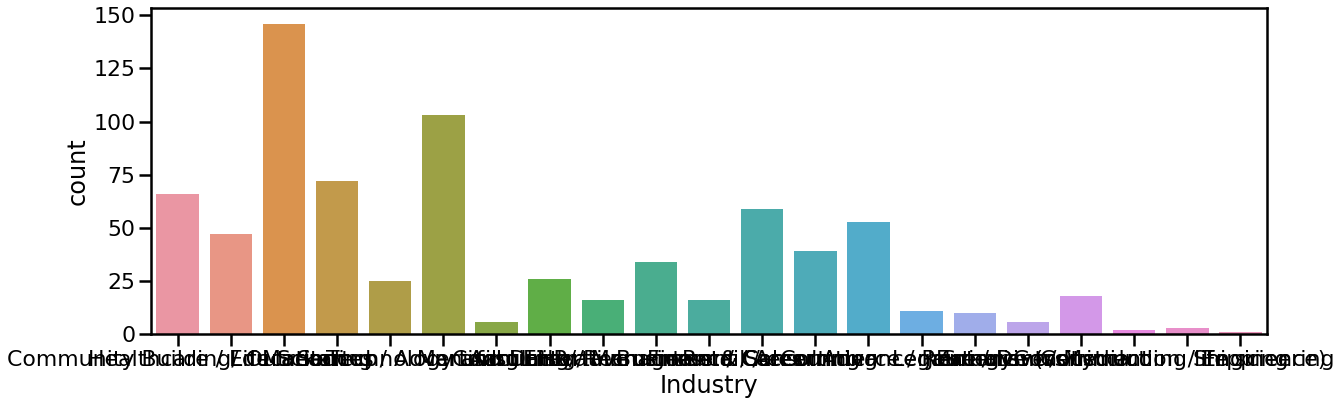

In [18]:
plt.figure(figsize=(20,6))
sns.countplot(x='Industry', data=df,orient='v')

### Create dataframe for counts of industries

In [19]:
industry_df = pd.DataFrame()
industry_df['Industry'] = df['Industry']
industry_df['count'] = df['Industry'].groupby(df['Industry']).transform('count')
industry_df.head()

,Industry,count
0,Community Building/ Outreach,66.0
1,Healthcare / Life Sciences,47.0
2,Healthcare / Life Sciences,47.0
3,Education,146.0
4,Education,146.0


In [20]:
industry_df['Industry'].value_counts()

Education                                           146
Technology and Data                                 103
Startup                                              72
Community Building/ Outreach                         66
Finance / Accounting                                 59
Retail / eCommerce / Restaurants                     53
Healthcare / Life Sciences                           47
HR/ Recruitment / Career Advancement / Diversity     39
Consulting / Management Consulting                   34
Administrative                                       26
Marketing / Advertising                              25
Government                                           18
Entertainment                                        16
Business & Sales                                     16
Legal                                                11
Energy                                               10
Journalism / Media                                    6
Manufacturing                                   

In [21]:
df_industry = df.copy()

In [22]:
rename_industry = ({'Journalism / Media':'Other',
                   'Manufacturing':'Other',
                   'Construction / Engineering':'Other',
                   'Science (not including life science)':'Other',
                   'Shipping':'Other'})
df_industry['Industry'].replace(rename_industry,inplace=True)
df_industry['Industry'].value_counts()

Education                                           146
Technology and Data                                 103
Startup                                              72
Community Building/ Outreach                         66
Finance / Accounting                                 59
Retail / eCommerce / Restaurants                     53
Healthcare / Life Sciences                           47
HR/ Recruitment / Career Advancement / Diversity     39
Consulting / Management Consulting                   34
Administrative                                       26
Marketing / Advertising                              25
Government                                           18
Other                                                18
Business & Sales                                     16
Entertainment                                        16
Legal                                                11
Energy                                               10
Name: Industry, dtype: int64

In [23]:
rename_industry2 = ({'Technology and Data':'Technology',
                    'Community Building/ Outreach':'Community',
                    'Finance / Accounting':'Finance',
                    'Retail / eCommerce / Restaurants':'Retail',
                    'Healthcare / Life Sciences':'Healthcare',
                    'HR/ Recruitment / Career Advancement / Diversity':'HR',
                    'Consulting / Management Consulting':'Consulting',
                    'Marketing / Advertising':'Marketing',
                    'Business & Sales':'Business'})
df_industry['Industry'].replace(rename_industry2,inplace=True)
df_industry['Industry'].value_counts()

Education         146
Technology        103
Startup            72
Community          66
Finance            59
Retail             53
Healthcare         47
HR                 39
Consulting         34
Administrative     26
Marketing          25
Other              18
Government         18
Entertainment      16
Business           16
Legal              11
Energy             10
Name: Industry, dtype: int64

In [ ]:
sns.set_context('talk')
plt.figure(figsize=(20,50))
order = (['Education', 'Technology', 'Startup', 'Community', 'Finance','Retail',
          'Healthcare','HR','Consulting','Administrative','Marketing',
          'Government','Business','Entertainment','Legal','Energy','Other'])
sns.catplot(y='Industry',data=df_industry,kind='count',color='#421639',order=order)

### Save Pickle

# Race

In [25]:
df['How do you identify? (Race and Ethnicity)'].value_counts()

Black                                                                           177
African American                                                                 82
Latinx                                                                           68
Asian                                                                            39
South Asian                                                                      35
                                                                               ... 
Mixed - Black And White Of Jamaican, Irish, Portuguese, And English Ancestry      1
Mixed - Native Hawaiian, Japanese, Chinese, Filipino, Caucasian                   1
Non-hispanic African American                                                     1
Mexican-american.                                                                 1
Native American; Navajo Tribe                                                     1
Name: How do you identify? (Race and Ethnicity), Length: 231, dtype: int64

In [26]:
df['How do you identify? (Race and Ethnicity)'].nunique()

231

## Import re-cleaned data on race - from OpenRefine 

In [27]:
df2 = pd.read_csv('virtual_assembly_rsvp_list_noNames_cleaned3.csv')
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805 entries, 0 to 804
Data columns (total 11 columns):
 #   Column                                                  Non-Null Count  Dtype 
---  ------                                                  --------------  ----- 
 0   How do you identify? (Race and Ethnicity)               801 non-null    object
 1   race_category                                           805 non-null    object
 2   Are you looking for a new role or opportunity?          803 non-null    object
 3   What are your top 3 needs as a womxn of color at work?  773 non-null    object
 4   Billing Zip                                             776 non-null    object
 5   Job Title                                               805 non-null    object
 6   Job_Title_Grouped                                       805 non-null    object
 7   Career_Level                                            787 non-null    object
 8   Industry                                          

,How do you identify? (Race and Ethnicity),race_category,Are you looking for a new role or opportunity?,What are your top 3 needs as a womxn of color at work?,Billing Zip,Job Title,Job_Title_Grouped,Career_Level,Industry,Company,Company_Original
0,African American,Black,"Interested, but not actively seeking a new role",To have my expertise acknowledge\nTo be includ...,98118,"Director, Volunteer Engagement","Director, Volunteer Engagement",Executive/Director,Community Building/ Outreach,United Way Of King County,United Way Of King County
1,Multiracial Se Asian *and* Pacific Islander Am...,Multiracial,"Interested, but not actively seeking a new role",* As a result of the leaky STEMM pipeline in p...,98402,Biologist,Biologist,Mid,Healthcare / Life Sciences,University Of Washington,University Of Washington
2,South Asian,Asian,No,NaN,98107,Health Economist,Health Economist,Mid,Healthcare / Life Sciences,Seattle Genetics,Seattle Genetics
3,South Asian,Asian,"Interested, but not actively seeking a new role",representation and community of other womxn of...,98103,Principal,Principal,Executive/Director,Education,Mercer,Mercer
4,African American,Black,"Interested, but not actively seeking a new role",Affinity with a trusted band of people; for th...,98052,"Director, Opportunity, Equity And Inclusion","Director, Opportunity, Equity And Inclusion",Executive/Director,Education,Lake Washington School District,Lake Washington School District


In [29]:
df2['race_category'].value_counts()

Black          302
Asian          216
Hispanic       147
Multiracial     83
Caucasian       43
NHPI             6
Unknown          4
AIAN             4
Name: race_category, dtype: int64

In [30]:
colors_extended = colors = ['#421639','#1b3c31','#a26629','#9a7565','#e5e5e5','#674460','#48625a','#a0a0a0']
sns.set_palette(sns.color_palette(colors_extended))

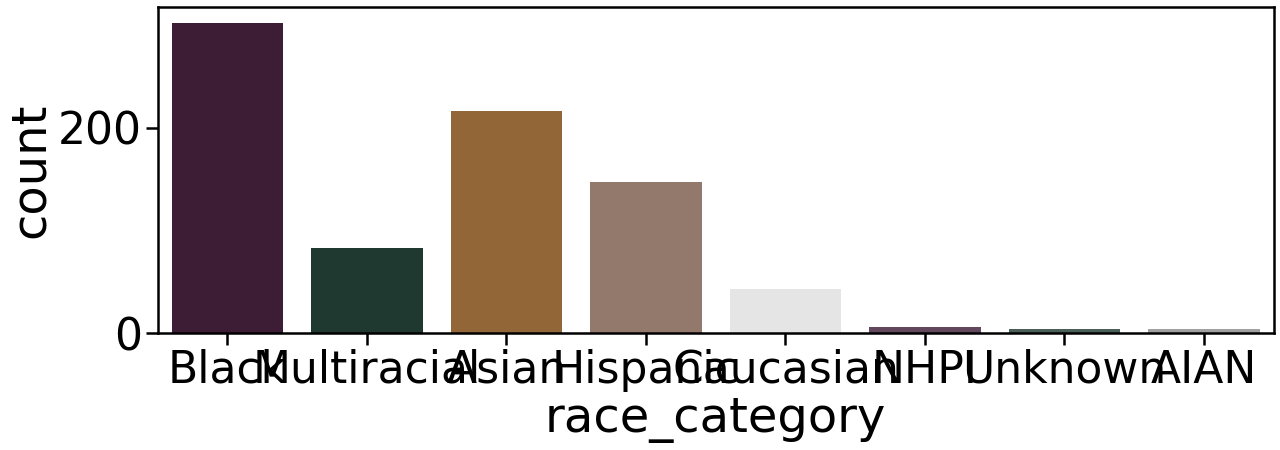

In [31]:
sns.set_context('poster',font_scale=2)
plt.figure(figsize=(20,6))
sns.countplot(x='race_category', data=df2)

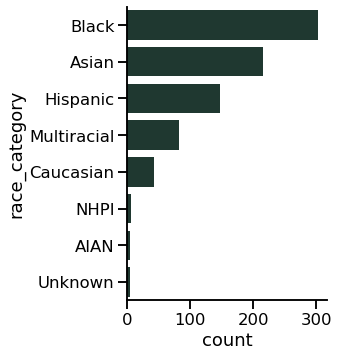

In [32]:
sns.set_context('talk')
order = ['Black', 'Asian', 'Hispanic', 'Multiracial', 'Caucasian','NHPI', 'AIAN', 'Unknown']
sns.catplot(y='race_category',data=df2,kind='count',color='#1b3c31', order=order)

In [33]:
from decimal import Decimal 

In [34]:
df3 = df2['race_category'].value_counts().rename_axis('unique_values').reset_index(name='counts')
df3['percent_attendees'] = df3['counts'].apply(lambda x: round(Decimal(x/805*100),2))
df3

,unique_values,counts,percent_attendees
0,Black,302,37.52
1,Asian,216,26.83
2,Hispanic,147,18.26
3,Multiracial,83,10.31
4,Caucasian,43,5.34
5,NHPI,6,0.75
6,Unknown,4,0.50
7,AIAN,4,0.50


In [35]:
df3['percent_attendees'].sum()

Decimal('100.01')

### Save pickle